
## Iris Data Set - Project 2019                                  
### Programing and Scripting 
### GMIT Galway
Slawomir Sowa
12/04/2019

### Objectives

Project concern Fisher’s Iris data set. 

1. Research background information about the data set and write a summary about it.
2. Keep a list of references you used in completing the project.
3. Download the data set and write some Python code to investigate it.
4. Summarise the data set by, for example, calculating the maximum, minimum and mean of each column of the data set. A Python script will quickly do this for you.
5. Write a summary of your investigations.
6. Include supporting tables and graphics as you deem necessary.






### Tools

To analyse Iris Data Set I work with Python 3.7 and Jupyter Notebook.  

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>

#### Used Libraries and tools

##### Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.
[http://pandas.pydata.org](http://pandas.pydata.org)

##### NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra, Fourier transform, and random number capabilities, Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.
[https://www.numpy.org/](https://www.numpy.org/)

##### Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.
[https://matplotlib.org/index.html](https://matplotlib.org/index.html)

##### Seaborn
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

##### Jupyter Notebook
The Jupyter Notebook is an open-source web application that allows to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. [https://jupyter.org/index.html](https://jupyter.org/index.html)

### Fisher's Iris Data Set
Sir Ronald Aylmer Fisher, byname R.A. Fisher, (born February 17, 1890, London, England—died July 29, 1962, Adelaide, Australia), British statistician and geneticist who pioneered the application of statistical procedures to the design of scientific experiments.

From the Wikipedia article “Iris flower data set” (https://en.wikipedia.org/wiki/Iris_flower_data_set)

>The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Getting Data

Iris Data Set downloaded from [www.kaggle.com](https://www.kaggle.com/saurabh00007/iriscsv)


To read data from `iris.csv` file I used `pandas` library and `read_csv` function. Variable `data` is my data frame. `data.shape` describes how many rows and columns is in data set. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

data = pd.read_csv('Iris.csv') 
data.shape

(150, 6)

Iris Data set has 150 rows and 6 columns.

`data.head(5)` allow mi to print first 5 rows of data set.

In [2]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Our data set contains 6 columns: `ID`, `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` and `Species`. 

Firstly I explaine what Sepal and Petal Length are. 
<img width='400px' src='http://suruchifialoke.com/img/icon_iris.png'>

Sepal is longer and Petal is shorther part of iris flower. All Sepal and Petal lengths are measured in cm.  

In [3]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


`data.tail(5)` function gives me last 5 rows taken from data set. As we see there is 150 rows. `ID` column enumerate all rows. 

Interesting things noticed in `species` column. We started with `iris-setosa` and finished with `iris-virginica`. Lets check how many different species we have in data set. 

In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

By using `value_counts()` function on my data frame `data` I found 3 unique values in `Spacies` column:`Iris-setosa`, `Iris-virginica` and `Iris-versicolor` and each type occurs 50 times.    

Is worth to check is any data missing in iris data set. To do that I used `isnull()` function from `pandas` library. Function returns boolean value `True` if `null` value exists and `False` if `not null` value founded. 

In [5]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

No missing data founded. <br>
Let's examine data types of each column. To do that I used `dtypes` object from `pandas` library.   

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Returned result shows that all data types are correct. In case, if we get multiple data types in single column `dtypes` return `object` data type. For columne `SepalLengthCm` we expecting to get `int` or `float` data type. Column `Species` contains `string`data type, in `pandas` it's called `object` data type.    

Let's separate species. Firstly I have to retrive iris-setosa species from data set and save it in to separate data frame `dfSetosa`. `data[data['Species'] == 'Iris-setosa']` statement compare each row in column `Species` with `Iris-setosa` object. If the same, then row is added to `dfSetosa` data frame. I take the same steps for `Iris-virginica` and `Iris-versicolor`.

In [7]:
dfSetosa = data[data['Species'] == 'Iris-setosa']
dfVirginica = data[data['Species'] == 'Iris-virginica']
dfversicolor = data[data['Species'] == 'Iris-versicolor']

## Iris-setosa Analyse

Now let's take a closer look on Iris-setosa type.  

In [8]:
dfSetosa['Species'].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

`dfSetosa['Species'].value_counts()` shows that new dataframe has 50 rows and contains only Iris-Setosa type. 
Now I calucate max, min, mean and standard deviation value for Sepal and Petal length and width by using `descibe()`function, which return table.

In [9]:
dfSetosa = dfSetosa.drop(['Id'], axis = 1)
dfSetosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


To get better view i decided to drop `Id` column by using `DataFrame.drop()` function.<br>
I got values formated in Table and as we can see from `mean`that Sepal is longer and wider than Petal for Iris Setosa Flower type.    

To show relationship between `Sepal length` and `Sepal width` of Iris Setosa type i used scatter plot. Trendline helps to make the relationship more clear. Scatter plots are sometimes called correlation plots, because they show how two variables are correlated. Plot shows low positive corelation between Sepal Lenghth and Sepal Width. 


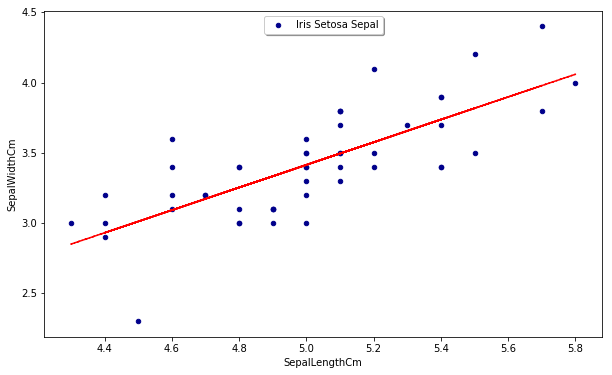

In [10]:
# Scatter plot od Sepal Length and Sepal Width
from numpy.polynomial import Polynomial

dfSetosa.plot(
    kind='scatter', # Plot Type: linear, histogram, pie, scatter etc. 
    x='SepalLengthCm', # data on x axis 
    y='SepalWidthCm',  # data on y axis 
    color='DarkBlue',  # color
    label='Iris Setosa Sepal', # label
    figsize=(10,6)) # chart size

# Set legend
plt.legend(
    loc='upper center', # place of legend
    shadow=True, # drop shadow
    frameon = True) # frame around legend 

#Trend line plot - to calculate trendline i used polyfit and poly1d function from NumPy library. 
z = np.polyfit(dfSetosa['SepalLengthCm'], dfSetosa['SepalWidthCm'], 1)
p = np.poly1d(z)

plt.plot(dfSetosa['SepalLengthCm'],p(dfSetosa['SepalLengthCm']), "r--",)

Calculate the same for Petal Length and Petal Width for Iris Setosa type.

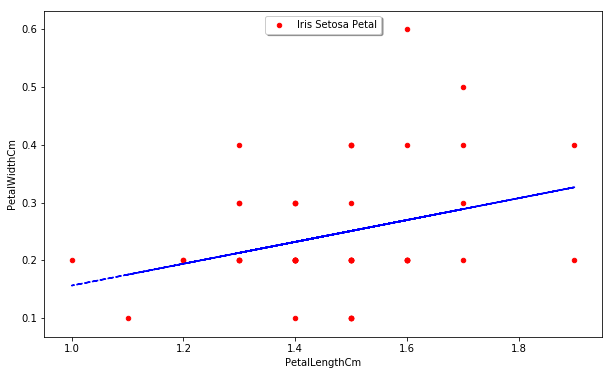

In [11]:
dfSetosa.plot(
    kind='scatter', 
    x='PetalLengthCm', 
    y='PetalWidthCm',  
    color='red',  
    label='Iris Setosa Petal',
    figsize=(10,6))

plt.legend(
    loc='upper center',  
    shadow=True, 
    frameon = True)

z = np.polyfit(dfSetosa['PetalLengthCm'], dfSetosa['PetalWidthCm'], 1)
p = np.poly1d(z)
plt.plot(dfSetosa['PetalLengthCm'],p(dfSetosa['PetalLengthCm']), "b--",)

### Frequency Charts 
Frequency charts shows the number of instances data values appear within a dataset. To plot I used `Matplotlib` and `Pandas` library.

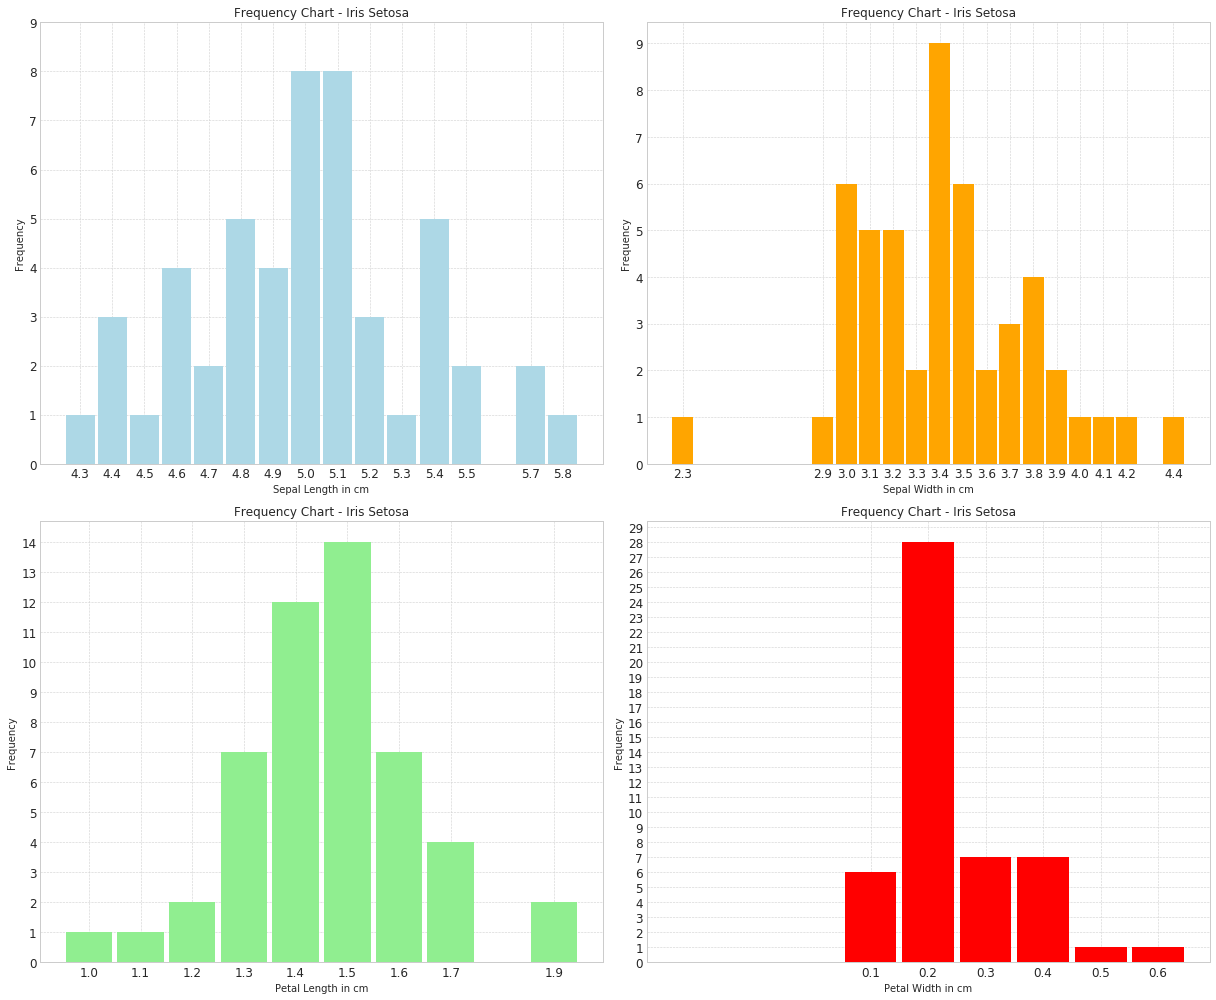

In [57]:
plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# ax - tell us where is plot, bins to find out, rwidth - bin width, 
dfSetosa['SepalLengthCm'].plot(
    kind='hist', # what kind of plot: linear, histogram, pie, scatter etc. 
    bins=np.arange(4.25,5.9,0.1), # set bin edges, 
    rwidth=0.9, # width of bin
    ax=ax[0][0], # shows where to plot   
    xticks=pd.unique(dfSetosa['SepalLengthCm']), # set ticks on x axis, as unique values from SepalLengthCm column 
    color='lightblue', # color of histogram
    grid=True, # set grid as True
    yticks=np.arange(0,10,1), # set ticks on y axis in range from 0 to 10 with step 1
    fontsize=12) # set font size for ticks on x and y axis

dfSetosa['SepalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(2.25,4.5,0.1), 
    rwidth=0.9, 
    ax=ax[0][1],
    xticks=pd.unique(dfSetosa['SepalWidthCm']),
    color='orange',
    grid=True,
    yticks=np.arange(0,10,1),
    fontsize=12)


dfSetosa['PetalLengthCm'].plot(
    kind='hist', 
    bins=np.arange(0.95,2.0,0.1), 
    rwidth=0.9, 
    ax=ax[1][0], 
    xticks=pd.unique(dfSetosa['PetalLengthCm']),
    color='lightgreen',
    grid=True,
    yticks=np.arange(0,15,1),
    fontsize=12)

dfSetosa['PetalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(-0.25,0.7,0.1), 
    rwidth=0.9, 
    ax=ax[1][1],
    xticks=pd.unique(dfSetosa['PetalWidthCm']), 
    color='red',
    grid=(True),
    yticks=np.arange(0,30,1),
    fontsize=12)

# set title and axis labels
ax[0][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Length in cm' )
ax[0][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Width in cm')
ax[1][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Length in cm')
ax[1][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Width in cm' )

# set grid color, line style and line width
ax[0][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[0][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()

Charts above shows that in Iris Setosa Sepal width we have value `2.3` which is significantly lover than other data points. Outliers represent unusual cases. Sometimes they represent data entry errors - Gross Errors, or perhaps data that does not belong with the other data of interest. 


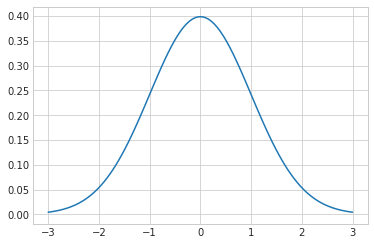

In [55]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.fill_between(x, 0,  )
plt.show()

### Cross Tables 
Lets find out what Frequency Percentage Distribution for Iris Setosa, <br>
To calcucate percentage i use `crosstab()`function from `Pandas` libreary. 

In [13]:
# comments to add
crossTable = pd.crosstab(index=dfSetosa['SepalLengthCm'], columns = 'count', )

# s_counts holds number of all values in table. We 
#s_counts=np.sum(s_counts)
sepalLengthNo, sepalWidthNo,petalLengthNo, petalWidthNo, speciesNo = dfSetosa.count()

#For better wiev I transpose table 
crossTable = crossTable.T

# statement below add new row 'Percent' with calculated field 
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalLengthNo)*100

crossTable

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.7,5.8
col_0,,,,,,,,,,,,,,,
count,1.0,3.0,1.0,4.0,2.0,5.0,4.0,8.0,8.0,3.0,1.0,5.0,2.0,2.0,1.0
Percent [%],2.0,6.0,2.0,8.0,4.0,10.0,8.0,16.0,16.0,6.0,2.0,10.0,4.0,4.0,2.0


Cross Table shows that `32%` of overall Iris Setosa Sepal Lengths belongs to `5.1` and `5.2` length. 

In [14]:
crossTable = pd.crosstab(index=dfSetosa['SepalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalWidthNo)
crossTable

SepalWidthCm,2.3,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
col_0,,,,,,,,,,,,,,,,
count,1.00,1.00,6.00,5.0,5.0,2.00,9.00,6.00,2.00,3.00,4.00,2.00,1.00,1.00,1.00,1.00
Percent [%],0.02,0.02,0.12,0.1,0.1,0.04,0.18,0.12,0.04,0.06,0.08,0.04,0.02,0.02,0.02,0.02


`18%` of overall Iris Setosa Sepal Width belongs to `3.4` cm width

In [15]:
crossTable = pd.crosstab(index=dfSetosa['PetalLengthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalLengthNo)
crossTable

PetalLengthCm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9
col_0,,,,,,,,,
count,1.00,1.00,2.00,7.00,12.00,14.00,7.00,4.00,2.00
Percent [%],0.02,0.02,0.04,0.14,0.24,0.28,0.14,0.08,0.04


`52%` of overall Iris Setosa Petal Length belongs to `1.4` and `1.5` cm length.

In [16]:
crossTable = pd.crosstab(index=dfSetosa['PetalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalWidthNo)
crossTable

PetalWidthCm,0.1,0.2,0.3,0.4,0.5,0.6
col_0,,,,,,
count,6.00,28.00,7.00,7.00,1.00,1.00
Percent [%],0.12,0.56,0.14,0.14,0.02,0.02


`56%` of overall Iris Setosa Petal Width belongs to `0.2` cm width.

#### Precision of a Set of Measurement

A data set of repetitive measurements is often expressed as a single representative number called the mean or average and it is a sum of individual measurements ($x_i$) devided by the number of measurements ($N$)

$$ \bar x  = \frac{\sum X_i}{N} $$

  
    
Deviation from the mean is the difference between the individual experimental value and the mean value. Calculated as:

$$ (x_i - \bar x) $$

    
Estimated standard deviation ($s$) from sample of population is a number used to tell how measurements for a group are spread out from the average or expected value. A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

$$ s = \sqrt { \frac {\sum (x_i - \bar x)^2}{N-1} } $$

Because we take a sample of population (selection taken from a bigger population of iris flowers), the number of degrees of freedom ($N−1$) is the total number of measurements minus one, called "Bessel's correction".

Lets calculate mean and standard deviation for Iris Setosa sepal length and width:

In [17]:
print('Iris Setosa Sepal Length mean =', np.round(dfSetosa['SepalLengthCm'].mean(),decimals=2)) 
print('Iris Setosa Sepal Length Standard Deviations =',np.round(dfSetosa['SepalLengthCm'].std(),decimals=2))
print()
print('Iris Setosa Sepal Width mean =',np.round(dfSetosa['SepalWidthCm'].mean(),decimals=1))
print('Iris Setosa Sepal Width Standard Deviations =',np.round(dfSetosa['SepalWidthCm'].std(),decimals=2))


Iris Setosa Sepal Length mean = 5.01
Iris Setosa Sepal Length Standard Deviations = 0.35

Iris Setosa Sepal Width mean = 3.4
Iris Setosa Sepal Width Standard Deviations = 0.38


Standard dimensions of Iris setosa sepal

$$sepal length  = 5.01 \pm 0.35 cm $$
$$sepal width  = 3.40 \pm 0.38 cm$$
    


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


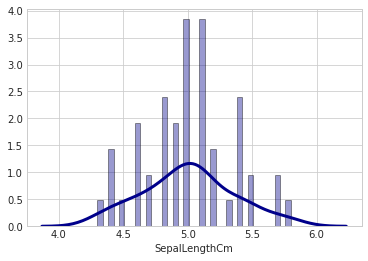

In [67]:
sns.distplot(dfSetosa['SepalLengthCm'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [18]:
print('Iris Setosa Petal Length mean =', np.round(dfSetosa['PetalLengthCm'].mean(),decimals=2)) 
print('Iris Setosa Petal Length Standard Deviations =',np.round(dfSetosa['PetalLengthCm'].std(),decimals=2))
print()
print('Iris Setosa Petal Width mean =',np.round(dfSetosa['PetalWidthCm'].mean(),decimals=1))
print('Iris Setosa Petal Width Standard Deviations =',np.round(dfSetosa['PetalWidthCm'].std(),decimals=2))

Iris Setosa Petal Length mean = 1.46
Iris Setosa Petal Length Standard Deviations = 0.17

Iris Setosa Petal Width mean = 0.2
Iris Setosa Petal Width Standard Deviations = 0.11


Standard dimensions of Iris setosa petal

$$Petal length  = 1.46 \pm 0.17 cm $$
$$Petal width  = 0.20 \pm 0.11 cm$$

#### Boxplot
Boxplot gives a summary of one or several numeric variables. The line that divides the box into 2 parts represents the `median` of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers.

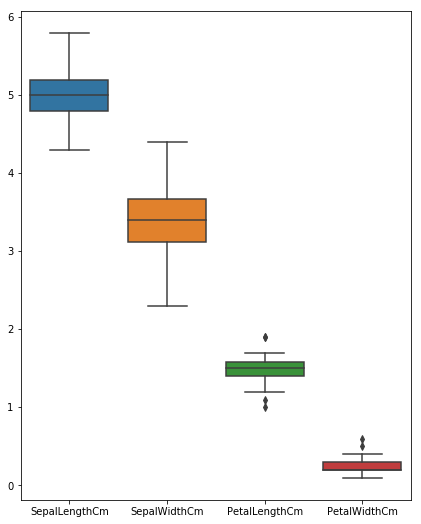

In [19]:

plt.figure(figsize=(7,9))
sns.boxplot(data=dfSetosa,)


### Summary 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


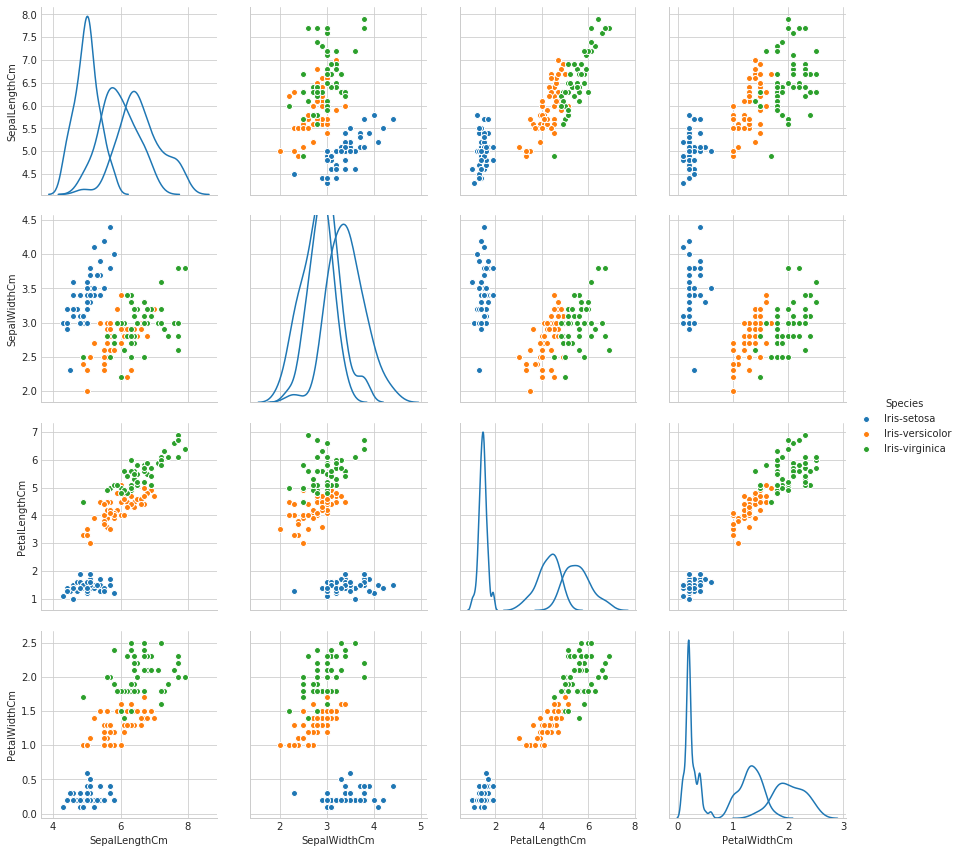

In [20]:
# drop ID column from data frame for better view
data = data.drop(['Id'], axis = 1)

#plot grid of scatter plots
sns.set_style("whitegrid")
sns.pairplot(data,hue='Species', diag_kind='kde', size=3);
plt.show()

##### Frequency Charts and Cross Tables summary:

* `32%` of Iris Setosa Sepal length have `5.0 cm` and `5.1 cm`. In range between `4.3 cm` and `5.8 cm` and average `5.01 cm`. Standard deviation from average `0.35`.
* `18%` of overall Iris Setosa Sepal Width belongs to `3.4 cm` width
* `52%` of overall Iris Setosa Petal Length belongs to `1.4 cm` and `1.5 cm` length.
* `56%` of overall Iris Setosa Petal Width belongs to `0.2 cm` width.

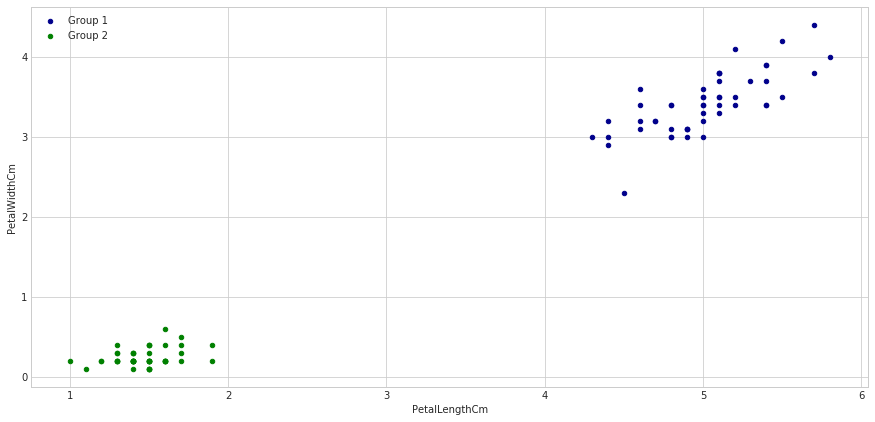

In [21]:

ax = dfSetosa.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='DarkBlue', label='Group 1',figsize=(15,7))

dfSetosa.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Group 2', ax = ax)

In [22]:
np.std([1,2.3])

0.6499999999999999

References 
https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe

Iris Data set downloaded From
https://www.kaggle.com/saurabh00007/iriscsv

!!! Fishers Notebook !!!
http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf
http://patrickhoey.com/downloads/Computer_Science/03_Patrick_Hoey_Data_Visualization_Dataset_paper.pdf


styles in pandas and seaborn
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

iris flower image 
https://www.snaplogic.com/machine-learning-showcase/iris-flower-classification

Pandas 
https://stackoverflow.com/a/33742822/11107506

Charts
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Set chart
https://stackoverflow.com/a/45080859/11107506

more charts 
https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

more charts
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

Scatter plot definition - corelation 
https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/

https://stackoverflow.com/a/26447505

https://pythonspot.com/matplotlib-legend/

Boxplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

check is null in data frame
https://stackoverflow.com/a/29530559/11107506

corss table 
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

https://pbpython.com/pandas-crosstab.html

font size 
https://stackoverflow.com/a/12444777/11107506

University of California, Irvine - Error Analysis
http://faculty.sites.uci.edu/chem2l/files/2011/04/RDGerroranal.pdf

Fisher
https://www.britannica.com/biography/Ronald-Aylmer-Fisher

NumPy polynomial Polyfit poly1d
https://www.numpy.org/devdocs/reference/generated/numpy.polynomial.polynomial.polyfit.html

Dixon test Statistic
https://sebastianraschka.com/Articles/2014_dixon_test.html